In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#'white', 'dark', 'whitegrid', 'darkgrid', 'ticks'

In [398]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from catboost import CatBoostClassifier, Pool, cv

In [399]:
train = pd.read_csv(r"C:\Users\Jair\Documents\Estudos Jair\projeto_machine_learning\machine_titanic\titanic\train.csv")
test = pd.read_csv(r"C:\Users\Jair\Documents\Estudos Jair\projeto_machine_learning\machine_titanic\titanic\test.csv")


In [400]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [401]:
#Olho as informações
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [402]:
#Faço um soma dos valores nulos
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [403]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [404]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [405]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [406]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [407]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [408]:
#cancatenamos os dois dataframe e colocamos em uma variavel
#tiramos o index antigo com o ignore_index = True
passengerid = test['PassengerId']
titanic_df = pd.concat([train, test], ignore_index= True)

In [409]:
#Usamos o len para contar quantos indexs têm
#fizemos uma subitração
train_index = len(train)

test_index = len(titanic_df) - len(test) 
test_index


891

In [410]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [411]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [412]:
df = pd.DataFrame()

Survived

In [413]:
titanic_df['Survived'].nunique()

2

In [414]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [415]:
titanic_df['Survived'].isnull().sum()

418

In [416]:
#Conta qunatos vezes se repetiram
#0.0 representa os mortos
#1.0 representa os vivos
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

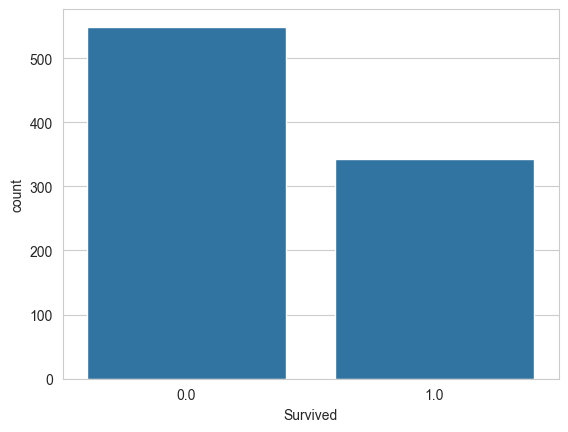

In [417]:
#Mostra um grafico com o seaborn
sns.countplot(data = titanic_df, x = 'Survived')

Quantidade de valores únicos :2

Quais são os valores únicos :[ 0.  1. nan]

Quantidade de valores nulos :418

Quantidade por opção :Survived
0.0    549
1.0    342
Name: count, dtype: int64


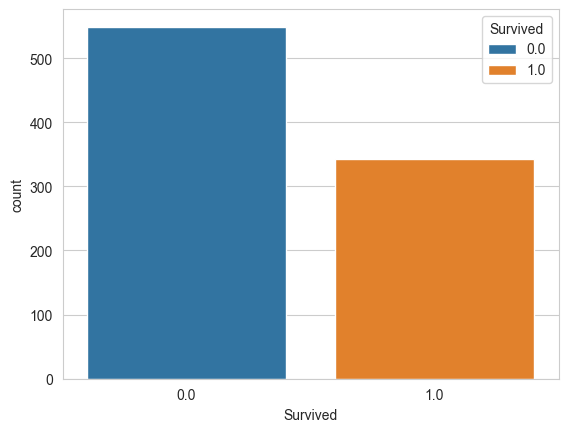

In [418]:
#Cria uma função onde poderar ser usada futuramente

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos :{data[column].nunique()}')
    print(f'\nQuais são os valores únicos :{data[column].unique()}')
    print(f'\nQuantidade de valores nulos :{data[column].isnull().sum()}')
    print(f'\nQuantidade por opção :{data[column].value_counts()}')

    if count == True:
        sns.countplot(data = data, x = column, hue= 'Survived')
    else:
        sns.displot(data[column], kde = True)


titanic_func(titanic_df, 'Survived')


In [419]:
#Criei um novo dataframe e nele adicione as informções do titanic_df['Survived']
df['Survived'] = titanic_df['Survived']

In [420]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


pclass

Quantidade de valores únicos :3

Quais são os valores únicos :[3 1 2]

Quantidade de valores nulos :0

Quantidade por opção :Pclass
3    709
1    323
2    277
Name: count, dtype: int64


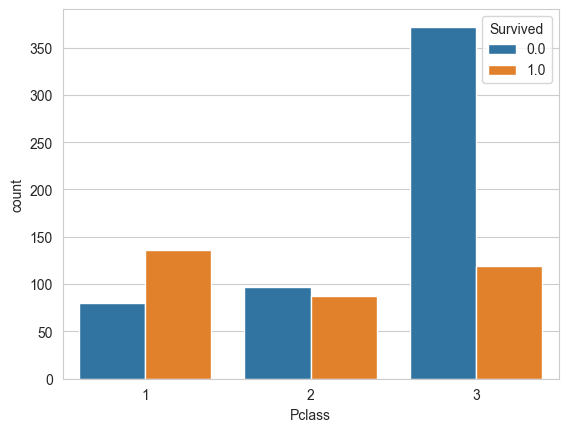

In [421]:
#Chamei novamente a funão que criei
titanic_func(titanic_df,'Pclass')

In [422]:
#no novo dataframe adicionei as informções do titanic_df['Survived']

df['Pclass'] = titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [423]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


SEX

In [424]:
#Usei a função replace para trocar o nome das informações da coluna
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])

C:\Users\Jair\AppData\Local\Temp\ipykernel_14100\2817142332.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])


Quantidade de valores únicos :2

Quais são os valores únicos :[0 1]

Quantidade de valores nulos :0

Quantidade por opção :Sex
0    843
1    466
Name: count, dtype: int64


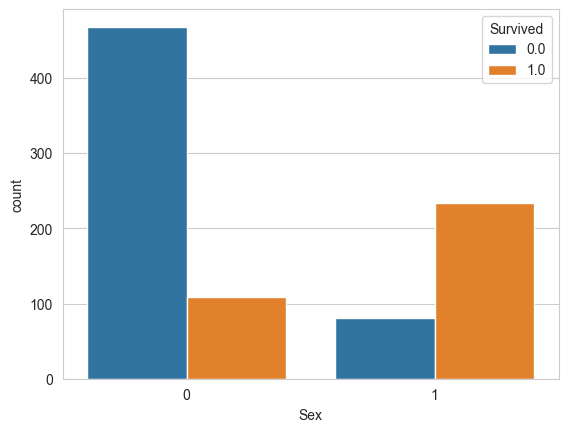

In [425]:
#Chamei a funcão novemanete
titanic_func(titanic_df,'Sex')

In [426]:
df['Sex'] = titanic_df['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


In [427]:
titanic_df.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


AGE

Quantidade de valores únicos :98

Quais são os valores únicos :[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos :263

Quantidade por opção :Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


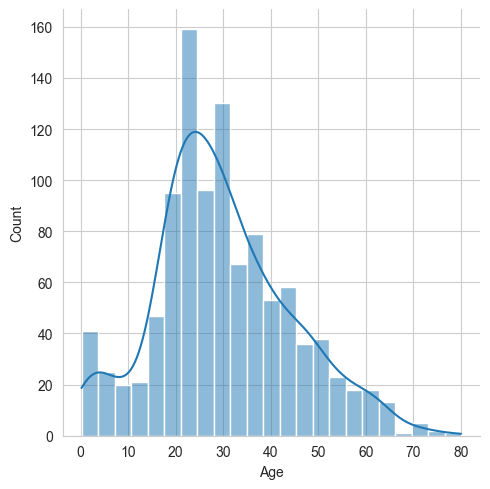

In [428]:
titanic_func(titanic_df, 'Age',False)

In [429]:
titanic_df['Age'].mean()

29.881137667304014

In [430]:
#função corr mostra a co-relação das colunas
#numeric_only=Tru serve para calcular somente os valores numericos 
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [431]:
#Pegamso as pessoas da primeira clase e a idade delas, e fizemops uma media
titanic_df[titanic_df['Pclass']  == 1]['Age'].mean()

39.15992957746479

In [432]:
titanic_df[titanic_df['Pclass']  == 2]['Age'].mean()

29.506704980842912

In [433]:
titanic_df[titanic_df['Pclass']  == 3]['Age'].mean()

24.81636726546906

In [434]:
#se fossem muitas informações o melhor jeito seria um loop
#Usando o unique() faz com sejam valores unicos somente 1, 2, 3
#função sorted faz com que fiquem em ordem
#:.2f faz com que só apareção 2 após o ponto
for i in sorted (titanic_df['Pclass'].unique()):
    print(f'Pessoas da {i} classe têm a média de idade de {titanic_df[titanic_df["Pclass"]  ==i]["Age"].mean():.2f}')

Pessoas da 1 classe têm a média de idade de 39.16
Pessoas da 2 classe têm a média de idade de 29.51
Pessoas da 3 classe têm a média de idade de 24.82


In [435]:
#a soma dos valores nulos
titanic_df['Age'].isnull().sum()

263

In [436]:
titanic_df['Age'][5]

nan

In [437]:
# pode se fazer dessa forma , mas não é a melhor forma de fazer isso
'''   for i in titanic_df.index:
        if pd.isnull(titanic_df['Age'][i]):
            if titanic_df['Pclass'][i] == 1:
                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
            elif titanic_df['Pclass'][i] == 2:
                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
            elif titanic_df['Pclass'][i] == 3:
                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
        else:
            continue '''

"   for i in titanic_df.index:\n        if pd.isnull(titanic_df['Age'][i]):\n            if titanic_df['Pclass'][i] == 1:\n                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())\n            elif titanic_df['Pclass'][i] == 2:\n                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())\n            elif titanic_df['Pclass'][i] == 3:\n                titanic_df.loc[i, 'Age'] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())\n        else:\n            continue "

In [454]:
# fazendo dessa forma vizualiza todos da primeira classe do pclass
titanic_df[titanic_df['Pclass'] == 1].head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
23,24,1.0,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0.0,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,39.0,1,0,PC 17569,146.5208,B78,C
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",0,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",0,42.0,1,0,113789,52.0000,NaN,S


In [439]:
# fazendo dessa forma vizualiza todos da primeira classe do pclass e idade['Age']

titanic_df[titanic_df['Pclass'] == 1] ['Age']

1       38.0
3       35.0
6       54.0
11      58.0
23      28.0
        ... 
1294    17.0
1295    43.0
1298    50.0
1302    37.0
1305    39.0
Name: Age, Length: 323, dtype: float64

In [440]:
# fazendo dessa forma vizualiza todos da primeira classe do pclass e idade['Age']
#Com a função isnull com a sum vizualizamos a somas dos nulos
titanic_df[titanic_df['Pclass'] == 1] ['Age'].isnull().sum()

39

In [441]:
#usei o titanic_df.loc para procurar a coluna Pclass 1, 2, 3 class
#E TAMBÉM A COLUNA Age COM A SUA MÉDIA
#A função round arredonda para proxiam casa decimal mais proxima
mean_class3 = round(titanic_df.loc[titanic_df['Pclass'] == 3] ['Age'].mean())
mean_class2= round(titanic_df.loc[titanic_df['Pclass'] == 2] ['Age'].mean())
mean_class1 = round(titanic_df.loc[titanic_df['Pclass'] == 1] ['Age'].mean())


In [442]:
titanic_df.loc[titanic_df['Pclass'] == 1, 'Age'] = titanic_df.loc[titanic_df['Pclass'] == 1, 'Age'].fillna(mean_class1)
titanic_df.loc[titanic_df['Pclass'] == 2, 'Age'] = titanic_df.loc[titanic_df['Pclass'] == 2, 'Age'].fillna(mean_class2)
titanic_df.loc[titanic_df['Pclass'] == 3, 'Age'] = titanic_df.loc[titanic_df['Pclass'] == 3, 'Age'].fillna(mean_class3)



In [444]:
titanic_df[titanic_df['Pclass']== 1] ['Age']

1       38.0
3       35.0
6       54.0
11      58.0
23      28.0
        ... 
1294    17.0
1295    43.0
1298    50.0
1302    37.0
1305    39.0
Name: Age, Length: 323, dtype: float64

In [453]:
titanic_df[titanic_df['Pclass'] == 1].isnull().sum()

PassengerId      0
Survived       107
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin           67
Embarked         2
dtype: int64